## Gathering Data


In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
import time
import matplotlib.pyplot as plt

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_prediction.tsv',mode='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image_prediction.tsv',delimiter='\t')

In [4]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Declare Twitter API keys and access tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [6]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet-json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [8]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [9]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [10]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [11]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

#### Assessing twitter_archive 

In [12]:
#get 20 samples from twitter_archive
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None
2276,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,None,None,None
1288,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708349470...,11,10,River,None,None,None,None
2182,668992363537309700,NaN,NaN,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668992363...,8,10,Harrison,None,None,None,None
920,756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm sure you've all seen this pupper. Not prep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130...,10,10,None,None,None,pupper,None
1805,676942428000112642,NaN,NaN,2015-12-16 01:50:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who leaves the last cupcake just sitting there...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676942428...,9,10,None,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None


In [13]:
# Check information of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#checing for duplicated 
sum(twitter_archive.duplicated())

0

In [15]:
# Check twitter_archive statistic 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# checking outliers on rating_denominator
pd.value_counts(twitter_archive['rating_denominator'].values, sort=True)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
dtype: int64

In [17]:
#Since max value is 1776 is too high on grade scale, check all rating score to see the outliers 
pd.value_counts(twitter_archive['rating_numerator'].values, sort=True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
dtype: int64

#### Assessing image_prediction

In [18]:
#get 20 samples from image_prediction
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
1328,757400162377592832,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1,seat_belt,0.523926,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
1767,826958653328592898,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
1721,819588359383371776,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True


In [19]:
# Check information of image_prediction
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#checing for duplicated 
sum(image_prediction.duplicated())

0

In [21]:
# Check image_prediction statistic 
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessing tweet_info

In [22]:
#get 20 samples from tweet_info
tweet_info.sample(20)

,id,retweet_count,favorite_count
1151,725729321944506368,2009,5646
1521,690607260360429569,19,313
2097,670717338665226240,547,1301
300,836677758902222849,2522,13782
1328,705786532653883392,596,2132
297,837012587749474308,88,0
628,794355576146903043,12014,0
1547,689255633275777024,1212,2805
971,750071704093859840,3802,8653
2031,671744970634719232,841,1430


In [23]:
tweet_info.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
# Check information of tweet_info
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
#checing for duplicated 
sum(tweet_info.duplicated())

0

In [26]:
# Check tweet_info statistic 
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality issues
- Re-tweet will not be counted 
- Timestamp column value is a string object
- rating_numerator column has values some very large ratings (1776, 960, 666, 420, 204, etc. )
- rating_denominator column has values other than 10
- Columns have empty values:retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- In image_prediction: p1,p2,p3 are in bad format. Need to capitalize the first letter of each word and remove "_"
- rating_numerator columns shoud be float datatype
- tweet_id and id is integer where it should be a string 
- rename id to tweet_id in tweet_into table to match other 2 tables

#### Tidiness issues
- doggo, floofer, pupper, and puppo is 4 different columns where can be in one variable 
- merge 3 tables into one on tweet_id 


## Cleaning

In [66]:
# Create copies of original DataFrames 
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_info_clean = tweet_info.copy()

#### Define

Delete retweets

#### Code

In [67]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

#### Test

In [68]:
twitter_archive_clean.shape

(2175, 17)

In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1


#### Define

Change datatype of Timestamp column from string to DateTime.

#### Code

In [70]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### Define

rating_numerator column has values some very large ratings (1176, 960, 666, 420, 204, etc. )
-  Assuming the highest rating is 15
- Change all values greater than 15 equal to 15.

#### Code

In [72]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.apply(lambda x: 15 if x > 15 else x)

#### Test

In [73]:
pd.value_counts(twitter_archive_clean['rating_numerator'].values, sort=True)

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
15     26
3      19
4      17
2       9
1       8
0       2
dtype: int64

#### Define

rating_denominator column has values other than 10

#### Code

In [74]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.apply(lambda x: 10 if x != 10 else x)

#### Test

In [75]:
pd.value_counts(twitter_archive_clean['rating_denominator'].values, sort=True)

10    2175
dtype: int64

#### Define

Drop columns what will not be used (source, expanded_urls) and columns with empty values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. 

#### Code

In [76]:
twitter_archive_clean.head (1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [77]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','expanded_urls','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [78]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define

In image_prediction: p1,p2,p3 in bad format. 
- Change '_' in between words to ' '

- Capitalize the first letter of each word

#### Code

In [79]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.replace('_', ' ')
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.replace('_', ' ')
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.replace('_', ' ')

In [80]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.title()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.title()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.title()

#### Test

In [81]:
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
123,668226093875376128,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,1,Trombone,0.390339,False,Cornet,0.314149,False,French Horn,0.255182,False
617,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,Christmas Stocking,0.149758,False,Cloak,0.128830,False,Teddy,0.109129,False
1233,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,Chow,0.575637,True,Pomeranian,0.195950,True,Norwich Terrier,0.141224,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,Marmot,0.358828,False,Meerkat,0.174703,False,Weasel,0.123485,False
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,Bookshop,0.794272,False,Cardigan,0.051265,True,Bernese Mountain Dog,0.026596,True
229,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,Pug,0.802223,True,French Bulldog,0.172557,True,Bull Mastiff,0.007163,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,Nail,0.855552,False,Screw,0.073277,False,Padlock,0.023970,False
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,Timber Wolf,0.503788,False,Malamute,0.430624,True,Siberian Husky,0.028454,True
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,Golden Retriever,0.969518,True,Labrador Retriever,0.021696,True,Border Terrier,0.002075,True


#### Define

rating_numerator columns shoud be float datatype

#### Code

In [82]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

#### Test

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 186.9+ KB


#### Define

Change tweet_id in twitter_archive_clean and image_prediction_clean datatype from integer to string
Change id in tweet_info_clean datatype from integer to string

#### Code

In [84]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)
tweet_info_clean.id = tweet_info_clean.id.astype(str)

#### Test

In [85]:
# Use type to check datatype of tweet_id and id columns
print(type(twitter_archive_clean.tweet_id[0]))
print(type(image_prediction_clean.tweet_id[0]))
print(type(tweet_info_clean.id[0])) 

<class 'str'>
<class 'str'>
<class 'str'>


#### Define

Rename id to tweet_id in tweet_into table

#### Code

In [86]:
# rename id column
tweet_info_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [87]:
tweet_info_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Define

 'doggo', 'floofer', 'pupper', and 'puppo' is 4 different columns where can be in one variable
     
     

#### Code

In [88]:
# merge the doggo, floofer, pupper and puppo columns one column name stage
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [89]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [90]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None


#### Define

- Rename id in tweet_info_clean to tweet_id
- Merge 3 tables together 

#### Code

In [91]:
# Merge twitter_archive_clean and image_prediction_clean
df = pd.merge(twitter_archive_clean, image_prediction_clean,on='tweet_id', how='inner')

In [92]:
#  Merge id and tweet_info_clean
df = pd.merge(df, tweet_info_clean,on='tweet_id', how='inner')

#### Test

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(3), datetime64[ns]

## Store data

In [94]:
df.to_csv('twitter_archive_master.csv')

## Analyze

In [95]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9774,41048


In [96]:
# Checking data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(3), datetime64[ns]

In [97]:
# Checking data statistic 
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1994.000000,1994.0,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,10.580742,10.0,1.203109,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,2.232306,0.0,0.560777,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.0,1.000000,0.362857,5.393988e-02,1.619283e-02,624.750000,1982.000000
50%,11.000000,10.0,1.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,12.000000,10.0,1.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,15.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


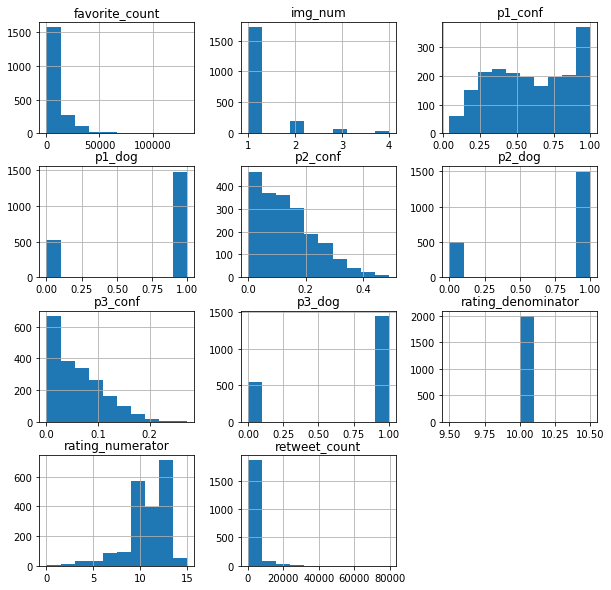

In [98]:
# Data inspected in visual
df.hist(figsize=(10,10));

## Visualizing Data

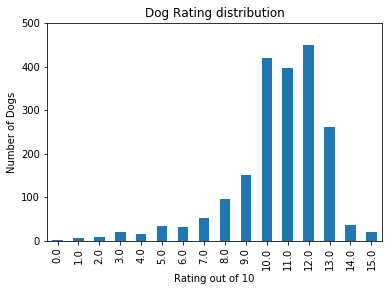

In [102]:
# Visualize rating distribution
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 100, 200, 300, 400, 500])
plt.savefig('rating')

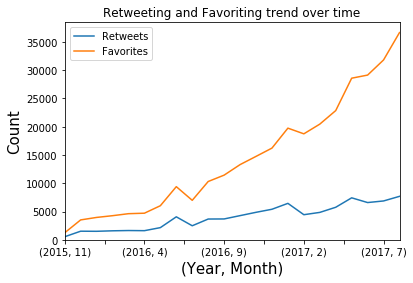

In [103]:
# Chart determine favorites and retweets rate
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count', fontsize=15)
plt.xlabel('(Year, Month)', fontsize=15)
plt.legend(('Retweets', 'Favorites'));

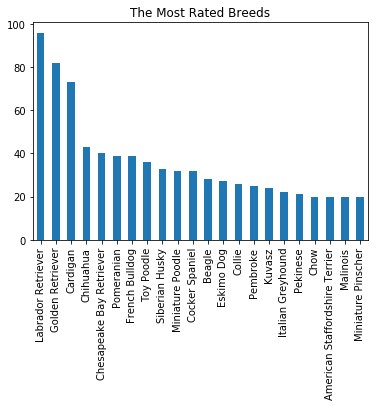

In [104]:
# Chart visualize most rated breeds
top=df.groupby('p2').filter(lambda x: len(x) >= 20)
top['p2'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');